# Predicting Electric Moped Reviews

## Company Background
EMO is a manufacturer of motorcycles. The company successfully launched its first electric moped in India in 2019. The product team knows how valuable owner reviews are in making improvements to their mopeds. 

Unfortunately they often get reviews from people who never owned the moped. They don’t want to consider this feedback, so would like to find a way to identify reviews from these people. They have obtained data from other mopeds, where they know if the reviewer owned the moped or not. They think this is equivalent to their own reviews.   


## Customer Question
- Can you predict which reviews come from people who have never owned the moped before?  


## Dataset
The dataset contains reviews about other mopeds from a local website.

| Column Name      | Criteria                                                                                                                                                                    |
|------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Used it for      | Character, the purpose of the electric moped for the user, one of “Commuting”, “Leisure”.                                                                                   |
| Owned for        | Character, duration of ownership of vehicle one of  “<= 6 months”, “> 6 months”, “Never Owned”.  Rows that indicate ownership should be combined into the category “Owned”. |
| Model name       | Character, the name of the electric moped.                                                                                                                                   |
| Visual Appeal    | Numeric, visual appeal rating (on a 5 point scale, replace missing values with 0).                                                                                           |
| Reliability      | Numeric, reliability rating (on a 5 point scale, replace missing values with 0).                                                                                             |
| Extra Feature    | Numeric, extra feature rating (on a 5 point scale, replace missing values with 0).                                                                                         |
| Comfort          | Numeric, comfort rating (on a 5 point scale, replace missing values with 0).                                                                                                 |
| Maintenance cost | Numeric, maintenance cost rating (on a 5 point scale, replace missing values with 0).                                                                                        |
| Value for money  | Numeric, value for money rating (on a 5 point scale, replace missing values with 0).                                                                                         |

# Data Scientist Associate Practical Exam Submission


In [92]:
#import libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

plt.style.use('ggplot')

In [93]:
moped = pd.read_csv('data/moped.csv')
moped.head()

,Used it for,Owned for,Model Name,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money
0,Commuting,Never owned,TVS iQube,3.0,4.0,NaN,4.0,NaN,1.0
1,Leisure,> 6 months,TVS iQube,3.0,1.0,NaN,3.0,NaN,3.0
2,Commuting,<= 6 months,TVS iQube,4.0,4.0,NaN,5.0,NaN,2.0
3,Commuting,> 6 months,TVS iQube,1.0,1.0,NaN,1.0,NaN,1.0
4,Commuting,> 6 months,TVS iQube,3.0,4.0,NaN,3.0,NaN,2.0


In [94]:
moped.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Used it for       713 non-null    object 
 1   Owned for         713 non-null    object 
 2   Model Name        713 non-null    object 
 3   Visual Appeal     713 non-null    float64
 4   Reliability       713 non-null    float64
 5   Extra Features    183 non-null    float64
 6   Comfort           510 non-null    float64
 7   Maintenance cost  176 non-null    float64
 8   Value for Money   370 non-null    float64
dtypes: float64(6), object(3)
memory usage: 50.3+ KB


> **Columns that have null values** <br>
> - Extra Features 
> - Comfort
> - Maintenance cost
> - Value for Money

**The null values in these columns need to be replaced with 0.** 

**All the 5-point scale variables are also currently float64 and need to be changed to int64**

**Further the "Owned for" column needs to be converted into a Ownership column that indicates whether the reviewer owned the moped or not only**

**Finally since the used it for column is also a binary column signifying either "Leisure" or "Commuting", this column will also be changed to binary column named "Commuting" indicating 1 for Commuting and 0 for Leisure.**

In [95]:
#make a copy of the moped df and store it in df
df = moped.copy()

#change the categories of the 'Owned for' column of the dataset to 'Owned' & 'Never owned'
df.loc[(df['Owned for'] == '> 6 months') | (df['Owned for'] == '<= 6 months'),'Owned for']='Owned'

#rename column to more accurately reflect what the column contains
df.rename(columns = {'Owned for':'Ownership'}, inplace = True)

#change to a binary column with 1 indicating owned and 0 indicating never owned
df['Ownership'] = pd.get_dummies(df['Ownership'])['Owned']

#checks
print(f'Ownership column dtype: {df["Ownership"].dtype}')
print(df['Ownership'].value_counts())

Ownership column dtype: uint8
1    578
0    135
Name: Ownership, dtype: int64


In [96]:
df['Used it for'] = pd.get_dummies(df['Used it for'])['Commuting']
df.rename(columns = {'Used it for':'Commuting'}, inplace = True)
df['Commuting']

0      1
1      0
2      1
3      1
4      1
      ..
708    1
709    0
710    1
711    1
712    1
Name: Commuting, Length: 713, dtype: uint8

In [97]:
df.fillna(0, inplace=True) # replace all missing values identified earlier with 0 inplace
df.isna().sum() == 0 # all columns should equal 0 as there should be no True/1 for a NA value

Commuting           True
Ownership           True
Model Name          True
Visual Appeal       True
Reliability         True
Extra Features      True
Comfort             True
Maintenance cost    True
Value for Money     True
dtype: bool

In [98]:
df['Visual Appeal'] = df['Visual Appeal'].astype('int64')
df['Reliability'] = df['Reliability'].astype('int64')
df['Extra Features'] = df['Extra Features'].astype('int64')
df['Comfort'] = df['Comfort'].astype('int64')
df['Maintenance cost'] = df['Maintenance cost'].astype('int64')
df['Value for Money'] = df['Value for Money'].astype('int64')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 713 entries, 0 to 712
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Commuting         713 non-null    uint8 
 1   Ownership         713 non-null    uint8 
 2   Model Name        713 non-null    object
 3   Visual Appeal     713 non-null    int64 
 4   Reliability       713 non-null    int64 
 5   Extra Features    713 non-null    int64 
 6   Comfort           713 non-null    int64 
 7   Maintenance cost  713 non-null    int64 
 8   Value for Money   713 non-null    int64 
dtypes: int64(6), object(1), uint8(2)
memory usage: 40.5+ KB


## Data Validation Summary

First we looked at a sample of the dataset to validate the criteria provided by the customer.<br>
All columns and column names were present but with incorrect dtypes.<br>
Next, we checked to see if there was any missing data in the dataset. **Four columns had missing data**:
- **Extra Features**
- **Comfort**
- **Maintenance cost**
- **Value for Money**

The null values in these columns were changed to 0 to reflect where, *on a 5-point scale*, the values actually lie.

Additionally, the **'Owned for'** column showed duration of ownership of vehicle with the following categories
- **<= 6 months**
- **\> 6 months**
- **Never Owned**

For our purposes we only needed to know whether or not the reviewer owned the vehicle and so all values were changed to:
- **Owned** &
- **Never owned**

One change that was made during this part of the analysis was changing the "Ownership" column, which is to be be our response variable in the machine learning models. We used pd.getdummies() and then selected the "Owned" column to give our model a binary, 1 or 0, variable so that it can actually be used in the model fitting process.

The same transformation was applied to the "Used it for" feature. Where we changed the it to the "Commuting" column where 1 means it was used for commuting and 0 means it was used for leisure

All changes made were followed with checks for consistency in the data and to make sure that the dataset was ready for further analysis and processing.

## Exploratory Analysis

In [99]:
df.describe() # overview of the numerical features of the dataset

,Commuting,Ownership,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money
count,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000,713.000000
mean,0.775596,0.810659,3.768583,3.314165,0.751753,2.611501,0.837307,1.748948
std,0.417482,0.392054,1.359949,1.584523,1.524639,2.031834,1.617638,2.011924
min,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,4.000000,4.000000,0.000000,3.000000,0.000000,1.000000
75%,1.000000,1.000000,5.000000,5.000000,1.000000,5.000000,0.000000,4.000000
max,1.000000,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


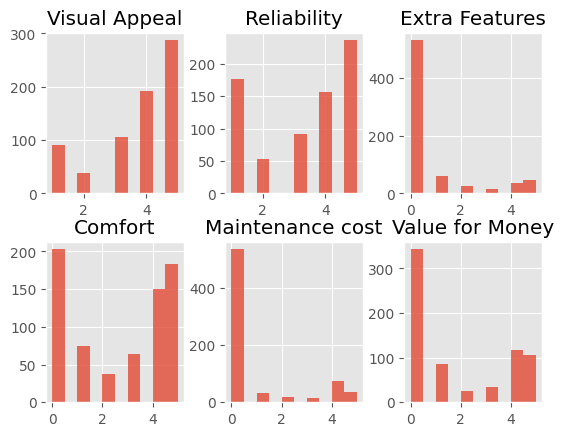

In [100]:
# numerical features
df.drop(['Ownership', 'Commuting'], axis=1).hist(layout= (2,3), alpha =0.8);

In [101]:
df.agg([np.mean, np.median, np.std])

,Commuting,Ownership,Visual Appeal,Reliability,Extra Features,Comfort,Maintenance cost,Value for Money
mean,0.775596,0.810659,3.768583,3.314165,0.751753,2.611501,0.837307,1.748948
median,1.000000,1.000000,4.000000,4.000000,0.000000,3.000000,0.000000,1.000000
std,0.417482,0.392054,1.359949,1.584523,1.524639,2.031834,1.617638,2.011924


<AxesSubplot:>

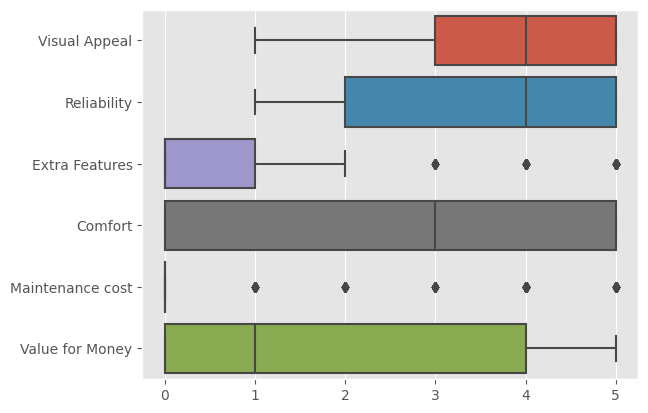

In [102]:
sns.boxplot(data=df.drop(['Commuting', 'Ownership'], axis=1), orient="h")

<AxesSubplot:xlabel='Commuting', ylabel='count'>

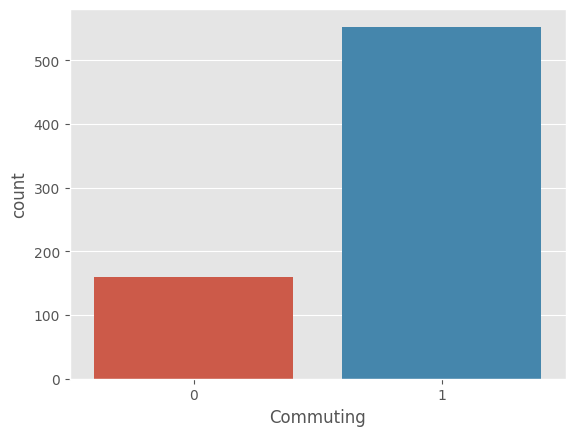

In [103]:
sns.countplot(x=df["Commuting"])

In [104]:
print(df['Model Name'].value_counts()) # value counts for each model
print("Number of unique mopeds:", len(df['Model Name'].value_counts())) # number of unique mopeds

Hero Electric Flash        94
Hero Electric Optima       75
Okinawa Praise             73
Revolt RV 400              44
PURE EV EPluto 7G          40
Hero Electric Photon       34
Tork Kratos                33
Ather 450X                 26
OLA S1 Pro                 25
Ampere Magnus EX           25
Ampere REO                 21
Benling Aura               19
OLA S1                     18
TVS iQube                  17
Ampere Magnus Pro          16
PURE EV ETrance Neo        16
Bajaj Chetak               13
Okinawa Ridge Plus         12
Okinawa i-Praise           11
Bounce Infinity E1         10
Hero Electric Optima CX     9
Ampere Zeal                 9
Techo Electra Raptor        8
Hero Electric NYX           8
Techo Electra Emerge        7
Revolt RV 300               6
Okinawa Lite                6
Okinawa R30                 6
Yo Drift                    5
Joy e-bike Wolf             5
Gemopai Ryder               5
Hero Electric Atria         3
Gemopai Astrid Lite         3
e-bike Gen

<AxesSubplot:xlabel='Ownership'>

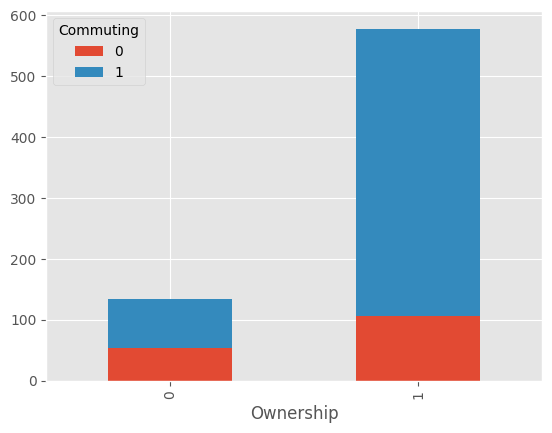

In [105]:
df.groupby(['Commuting', 'Ownership']).size().reset_index().pivot(columns='Commuting', index='Ownership', values=0).plot(kind='bar', stacked=True)

In [106]:
df.groupby(['Commuting', 'Ownership']).size()

Commuting  Ownership
0          0             54
           1            106
1          0             81
           1            472
dtype: int64

In [107]:
# Percentage of each model in the dataset that is of type "owned"
(df.groupby('Model Name')['Commuting'].sum()/df.groupby('Model Name')['Commuting'].agg(len)).sort_values(ascending=False)

Model Name
Joy e-bike Wolf            1.000000
Hero Electric Atria        1.000000
Techo Electra Raptor       1.000000
Techo Electra Emerge       1.000000
Okinawa Lite               1.000000
Joy e-bike Monster         1.000000
Hero Electric NYX          1.000000
e-bike Gen Nxt             1.000000
BGauss B8                  1.000000
TVS iQube                  0.941176
Ampere Magnus EX           0.920000
Okinawa Ridge Plus         0.916667
Ampere REO                 0.904762
Hero Electric Photon       0.882353
PURE EV ETrance Neo        0.875000
Okinawa R30                0.833333
PURE EV EPluto 7G          0.825000
Okinawa i-Praise           0.818182
Ampere Magnus Pro          0.812500
Ather 450X                 0.807692
Bounce Infinity E1         0.800000
Gemopai Ryder              0.800000
Yo Drift                   0.800000
Benling Aura               0.789474
Okinawa Praise             0.780822
Ampere Zeal                0.777778
Hero Electric Optima       0.760000
OLA S1 Pro       

## Exploratory Analysis Summary

The exploratory analysis mainly revealed a **class imbalance** in the dataset. This means that the response variable is not evenly represented in the data. **More than 80% of the observations are those of actual owners of vehicles and only 20% are non-owner observations**. Since we will be try to fit a model to this data it will be over exposed to "owned" vehicle reviews. We will have to **account for this through stratification** to ensure that the small amount of "non-owned" observations dont make their way entirely into either the train or test splits and that both train and test splits have an equal percentage of both types of observations.

A **multi facet histogram plot** was used to demonstrate the **characteristics of all 5 point scale numerical variables** in the data which revealed that **most** of the variables were either **right skewed or left skewed**. A **boxplot** of the same variables was also visualized to get an overview of the **spread** of the data in these variables and the repsective **range**, **median**, **IQRs**, and **outliers** of the data.

A **stacked bar plot** of the **"Ownership"** and **"Commuting for"** features demonstrated the relationship between these two variables. About **33% of the "Leisure" users never owned the vehicle they were reviewing**, whereas only about **14% of "Commuting" users never owned the vehicle in question**. 

*This means that, at a glance, we can estimate that those who use the vehicle for "Commuting" are more likely to own the vehicle than those who use it for "Leisure"*




In [108]:
from sklearn.linear_model import LogisticRegression # comparison  model
from sklearn.tree import DecisionTreeClassifier # baseline model
from sklearn.model_selection import train_test_split # preprocessing data into train and test sets
from sklearn.metrics import accuracy_score

features = ['Visual Appeal','Reliability','Extra Features','Comfort','Maintenance cost','Value for Money']

X = df.drop(['Ownership', 'Model Name'], axis=1)
y = df['Ownership'].values


X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.20, stratify=y)

# Fit baseline Decision Tree Model
dt_model = DecisionTreeClassifier(random_state=123)
dt_model.fit(X_train, y_train)

# Fit comparison Logistic Regression Model
logit_model = LogisticRegression(random_state=123)
logit_model.fit(X_train, y_train)


DecisionTreeClassifier(random_state=123)

LogisticRegression(random_state=123)

## Model Fitting Summary

The machine learning problem presented here is a classification problem. Given a set of features we need to determine whether we can predict a binary outcome i.e. whether or or not the reviewer owned the vehicle.

For the baseline model, a Decision Tree model was chosen. This is because it is a supervised learning method used for classification as well as regression.

For the comparison model, Logistic regression was selected as it is useful when the outcome of a target variable is of a binary nature. To predict the target variable classes, logistic regression employs one or more predictor variables that might be either continuous or categorical.

In [109]:
from sklearn.metrics import accuracy_score

dt_preds = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_preds)
print(f"Decision Tree Accuracy Score: {dt_accuracy}")

logit_preds = logit_model.predict(X_test)
logit_accuracy = accuracy_score(y_test, logit_preds)
print(f"Logistic Regression Accuracy Score: {logit_accuracy}")

dt_accuracy = accuracy_score(y_test, dt_preds)
logit_accuracy = accuracy_score(y_test, logit_preds)

Decision Tree Accuracy Score: 0.7902097902097902
Logistic Regression Accuracy Score: 0.8041958041958042


## Model Evaluation Summary

The metric selected to compare both models is the accuracy score. Since we are dealing with a classification problem and the model outputs are also both binary we can easily compare models by using an accuracy score that will tell us what percentage of predictions were correct.

The **Decision Tree** has an **accuracy score** of about **79%** whereas the **Logistic Regression** Model has an **accuracy** of about **80%**. This tells us that the **Logistic Regression** Model is **slightly better** at classifying the response variable given the set of features we used to determine whether the vehicle was owned or not.

Based on the **final evaluation**, the **Logistic Regression** Model seems to be the **better performing** approach as it has a **higher accuracy** score and can be used **going forward** for **cross-validation** and **hyperparameter tuning**.